In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [2]:
import os
import shutil
import random
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
import keras 
import os
import glob 
import cv2
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import matplotlib.pyplot as plt

target_size = (224,224)
fruits = ["acerolas", "apples", "apricots", "avocados", "bananas", "blackberries", "blueberries", 
          "cantaloupes", "cherries", "coconuts", "figs", "grapefruits", "grapes", "guava", "kiwifruit", 
          "lemons", "limes", "mangos", "olives", "oranges", "passionfruit", "peaches", "pears", "pineapples", 
          "plums", "pomegranates", "raspberries", "strawberries", "tomatoes", "watermelons"]


for fruit in fruits:
    img_dir = f'C:\\Users\\DELL\\Downloads\\FIDS30\\{fruit}'
    data_path = os.path.join(img_dir, '*g')  # global path of the img_dir.....
    files = glob.glob(data_path)  # all the files inside the data path is here...
    
    save_dir = f'C:\\FIDS30\\{fruit}'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for f1 in files:
        img = load_img(f1, target_size=target_size)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        i = 0
        path, dir, files = next(os.walk(img_dir))
        file_counts = len(files)
        for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='a',
                                  save_format='jpg'):
            i += 1
            if i == 10:  # from each image 10 images will be generated in a new file
                break

In [3]:

dir_path = "C:\\FIDS30"
# Define the classes

classes = ["acerolas", "apples", "apricots", "avocados", "bananas", "blackberries", "blueberries", 
          "cantaloupes", "cherries", "coconuts", "figs", "grapefruits", "grapes", "guava", "kiwifruit", 
          "lemons", "limes", "mangos", "olives", "oranges", "passionfruit", "peaches", "pears", "pineapples", 
          "plums", "pomegranates", "raspberries", "strawberries", "tomatoes", "watermelons"]
# Define the training and testing directories

train_dir = "C:\\FIDS30\\train_dir"
test_dir = "C:\\FIDS30\\test_dir"
# Create the training and testing directories

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

for class_name in classes:
    class_dir = os.path.join(dir_path, class_name)
    image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith(".jpg") or f.endswith(".png")]
    train_files, test_files = train_test_split(image_files, test_size=0.1, random_state=42)
    # Copy the training files to the training directory
    for file_path in train_files:
        file_name = os.path.basename(file_path)
        new_file_path = os.path.join(train_dir, class_name, file_name)
        if not os.path.exists(os.path.join(train_dir, class_name)):
            os.makedirs(os.path.join(train_dir, class_name))
        shutil.copy(file_path, new_file_path)
    # Copy the testing files to the testing directory
    for file_path in test_files:
        file_name = os.path.basename(file_path)
        new_file_path = os.path.join(test_dir, class_name, file_name)
        if not os.path.exists(os.path.join(test_dir, class_name)):
            os.makedirs(os.path.join(test_dir, class_name))
        shutil.copy(file_path, new_file_path)

In [4]:
from tensorflow import keras

In [5]:
train_data='C:\\FIDS30\\train_dir'
test_data='C:\\FIDS30\\test_dir'

In [6]:
from sklearn.datasets import load_files

In [7]:
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

X_train, Y_train, labels = get_data(train_data)
X_test, Y_test,_ = get_data(test_data)

In [8]:
from keras.utils import to_categorical

In [9]:
Y_train = to_categorical(Y_train, 30)
Y_test = to_categorical(Y_test, 30)

In [10]:
print(X_train.shape)
print(X_test.shape)

(8578,)
(968,)


In [11]:
X_train, X_val = train_test_split(X_train, test_size=0.1, random_state=42)
Y_train, Y_val = train_test_split(Y_train, test_size=0.1, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7720,)
(968,)
(858,)


In [13]:
import keras 
import os
import glob 
import cv2
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import matplotlib.pyplot as plt

def convert_image_to_array(files, target_size):
    images_as_array = []
    for file in files:
        img = load_img(file, target_size=target_size)  # Load and resize the image
        img_array = img_to_array(img)
        images_as_array.append(img_array)
    return images_as_array

# Define the target size for resizing

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7720,)
(968,)
(858,)


In [14]:
target_size = (224, 224)

# Convert images to arrays
X_train = np.array(convert_image_to_array(X_train, target_size))
X_val = np.array(convert_image_to_array(X_val, target_size))
X_test = np.array(convert_image_to_array(X_test, target_size))


In [15]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

In [17]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense, Attention, Input

# Define the CNN model with attention
model = Sequential()

# Input shape is 100x100 since that's the dimension of each fruit image
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(224, 224, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

# Applying attention after the last convolutional layer
attention = Attention()([model.layers[-1].output, model.layers[-1].output])

# Fully connected layers
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(30, activation='softmax'))

# Creating the model with attention
model_with_attention = Model(inputs=model.input, outputs=model.output)

# Displaying the summary of the model
model_with_attention.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 activation (Activation)     (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                      

In [18]:
from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model_with_attention.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [19]:
history = model_with_attention.fit(X_train,Y_train,
        batch_size = 128,
        epochs=20,
        validation_data=(X_val, Y_val),
        verbose=2, shuffle=True)

Epoch 1/20


61/61 - 113s - loss: 2.7498 - accuracy: 0.1808 - val_loss: 2.1683 - val_accuracy: 0.3590 - 113s/epoch - 2s/step
Epoch 2/20
61/61 - 77s - loss: 2.0397 - accuracy: 0.3497 - val_loss: 1.7060 - val_accuracy: 0.4592 - 77s/epoch - 1s/step
Epoch 3/20
61/61 - 77s - loss: 1.6453 - accuracy: 0.4618 - val_loss: 1.4115 - val_accuracy: 0.5268 - 77s/epoch - 1s/step
Epoch 4/20
61/61 - 75s - loss: 1.3814 - accuracy: 0.5402 - val_loss: 1.2125 - val_accuracy: 0.6014 - 75s/epoch - 1s/step
Epoch 5/20
61/61 - 75s - loss: 1.1677 - accuracy: 0.6113 - val_loss: 1.1399 - val_accuracy: 0.6177 - 75s/epoch - 1s/step
Epoch 6/20
61/61 - 75s - loss: 1.0463 - accuracy: 0.6435 - val_loss: 1.0053 - val_accuracy: 0.6783 - 75s/epoch - 1s/step
Epoch 7/20
61/61 - 76s - loss: 0.9247 - accuracy: 0.6790 - val_loss: 0.8659 - val_accuracy: 0.7168 - 76s/epoch - 1s/step
Epoch 8/20
61/61 - 77s - loss: 0.7630 - accuracy: 0.7418 - val_loss: 0.8323 - val_accuracy: 0.7086 - 77s/epoch - 1s/step
Epoch 9/20
61/61 - 75s - los

In [20]:
score = model_with_attention.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

31/31 [==============================] - 6s 86ms/step - loss: 0.5448 - accuracy: 0.8233
Test accuracy: 0.8233470916748047


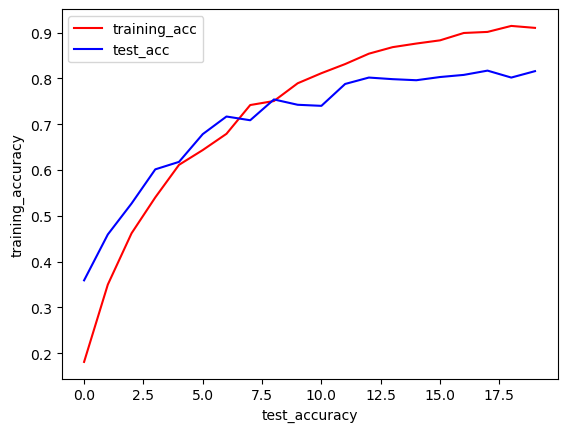

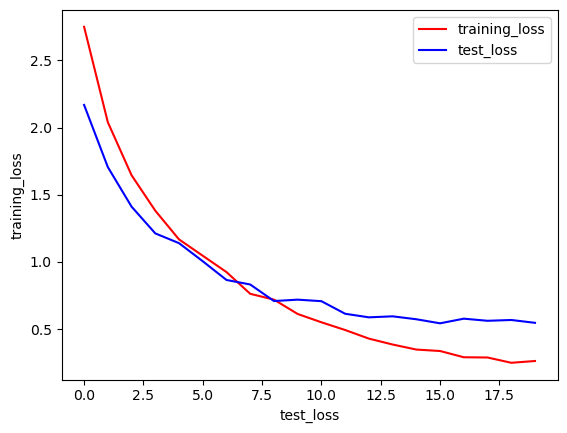

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'training_acc')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'test_acc')
plt.ylabel('training_accuracy')
plt.xlabel('test_accuracy')
plt.legend()
plt.show()




plt.plot(history.history['loss'],color = 'red',label = 'training_loss')
plt.plot(history.history['val_loss'],color = 'blue',label = 'test_loss')
plt.ylabel('training_loss')
plt.xlabel('test_loss')
plt.legend()
plt.show()


31/31 [==============================] - 6s 75ms/step


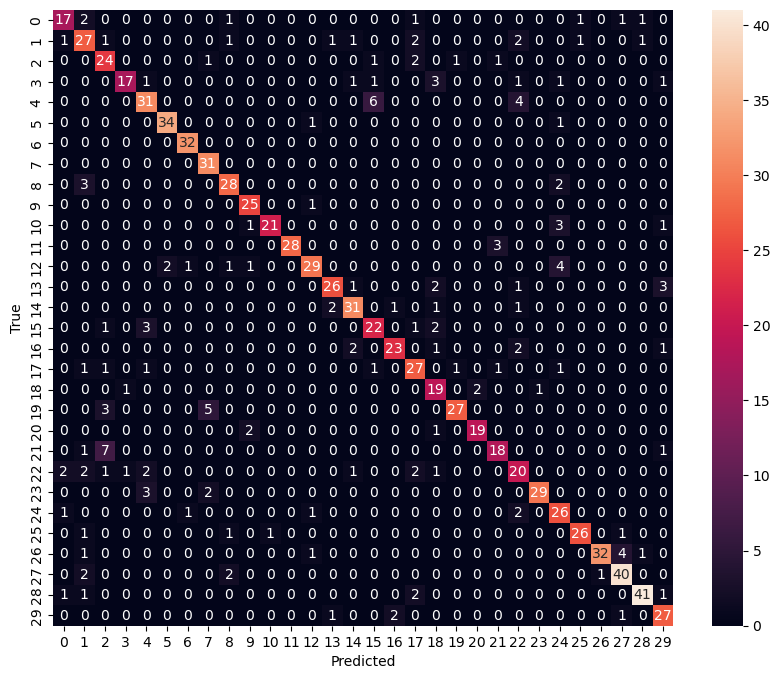

31/31 [==============================] - 5s 97ms/step - loss: 0.5448 - accuracy: 0.8233
Test accuracy is 0.8233470916748047 and test loss is 0.5447893142700195


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


y_pred = model_with_attention.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

confusion_mtx = confusion_matrix(np.argmax(Y_test, axis=1), y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

test_loss, test_acc = model_with_attention.evaluate(X_test, Y_test)
print(f"Test accuracy is {test_acc} and test loss is {test_loss}")


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on test set
Y_pred = model_with_attention.predict(X_test)
# Convert predictions to one-hot encoded labels
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_true_labels = np.argmax(Y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_true_labels, Y_pred_labels)

# Classification Report
class_report = classification_report(Y_true_labels, Y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


31/31 [==============================] - 5s 81ms/step
Confusion Matrix:
[[17  2  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  1  0  1  1  0]
 [ 1 27  1  0  0  0  0  0  1  0  0  0  0  1  1  0  0  2  0  0  0  0  2  0
   0  1  0  0  1  0]
 [ 0  0 24  0  0  0  0  1  0  0  0  0  0  0  0  1  0  2  0  1  0  1  0  0
   0  0  0  0  0  0]
 [ 0  0  0 17  1  0  0  0  0  0  0  0  0  0  1  1  0  0  3  0  0  0  1  0
   1  0  0  0  0  1]
 [ 0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  4  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  1  0  0  0  0  0  0  0  0  0  0  0

In [16]:
from tensorflow.keras.applications import VGG16

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
#from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [18]:
vgg16 = VGG16(weights='imagenet',include_top = False,input_shape = (224,224,3))
vgg16.trainable = False

In [19]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
transfer_learning = Sequential()
transfer_learning.add(vgg16)
transfer_learning.add(Conv2D(1024, kernel_size=3, padding='same'))
transfer_learning.add(Activation('relu')) 
transfer_learning.add(MaxPooling2D(pool_size=(2, 2)))
transfer_learning.add(Dropout(0.3))
transfer_learning.add(Flatten())
transfer_learning.add(Dense(150))
transfer_learning.add(Activation('relu'))
transfer_learning.add(Dropout(0.3))
transfer_learning.add(Dense(30,activation = 'softmax'))

In [21]:
transfer_learning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 1024)        4719616   
                                                                 
 activation (Activation)     (None, 7, 7, 1024)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 1024)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                        

In [22]:
from keras.optimizers import SGD, Adam, RMSprop
optimizer = Adam()
transfer_learning.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
history = transfer_learning.fit(X_train,Y_train, 
                                 batch_size = 128, 
                                 epochs=20, 
                                 validation_data=(X_val, Y_val), 
                                 verbose=2, shuffle=True)

Epoch 1/20


61/61 - 1032s - loss: 3.0443 - accuracy: 0.1622 - val_loss: 2.1301 - val_accuracy: 0.3939 - 1032s/epoch - 17s/step
Epoch 2/20


: 